In [0]:
import numpy as np
import pandas as pd

In [0]:
from keras.datasets import mnist
(X_train, Y_train) , (X_test , Y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train.iloc[:,:]

AttributeError: ignored

In [0]:
X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])
X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])
num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

AttributeError: ignored

In [1]:
import keras
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/My Drive/Colab Notebooks'
train_path = gdrive_path+'/sign_mnist_train.csv'
test_path = gdrive_path+'/sign_mnist_test.csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [0]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


In [0]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

TypeError: ignored

In [0]:
y_train.shape

(27455, 26)

In [0]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [0]:
classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





27455/27455 [==============================] - 12s 422us/step - loss: 8.7253 - acc: 0.2353
Epoch 2/50
27455/27455 [==============================] - 10s 378us/step - loss: 0.7396 - acc: 0.7467
Epoch 3/50
27455/27455 [==============================] - 10s 379us/step - loss: 0.4393 - acc: 0.8452
Epoch 4/50
27455/27455 [==============================] - 11s 385us/step - loss: 0.3269 - acc: 0.8834
Epoch 5/50
27455/27455 [==============================] - 11s 382us/step - loss: 0.2526 - acc: 0.9123
Epoch 6/50
27455/27455 [==============================] - 10s 379us/step - loss: 0.2082 - acc: 0.9268
Epoch 7/50
27455/27455 [==============================] - 10s 379us/step - loss: 0.1702 - acc: 0.9414
Epoch 8/50
27455/27455 [==============================] - 10s 378us/step - loss: 0.1541 - acc: 0.9464
Epoch 9/50
27455/27455 [==============================] - 10s 379us/step - loss: 0

In [0]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

7172/7172 [==============================] - 1s 186us/step
Accuracy:  0.9584495259341885


In [0]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 3, 3, 128)         2176      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [0]:
classifier.save(gdrive_path+'/CNNmodel.h5') #load model มาใช้ได้เลย ไม่ต้องรู้โครง

In [0]:
import cv2
import numpy as np
from keras.models import load_model
from skimage.transform import resize, pyramid_reduce
import PIL
from PIL import Image

In [6]:
model = load_model(gdrive_path+'/CNNmodel.h5')







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
def prediction(pred):
    return(chr(pred+ 65))

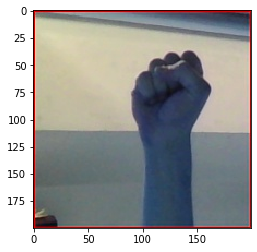

In [26]:

import cv2
import matplotlib.pyplot as plt

img_path = gdrive_path+'/S19.jpg'
img = cv2.imread(img_path) # reads image 'opencv-logo.png' as grayscale
plt.imshow(img)

In [0]:
def crop_image(image, x, y, width, height):
    return image[y:y + height, x:x + width]

In [0]:
img.shape

(224, 224, 3)

In [0]:
  
# capturing the image from webcam 
        
        image_frame = img
  
# to crop required part
        #im2 = crop_image(image_frame, 100,100,100,100)
# convert to grayscale 
     
        image_grayscale = cv2.cvtColor(image_frame, cv2.COLOR_BGR2GRAY)
# blurring the image 
  
        image_grayscale_blurred =cv2.GaussianBlur(image_grayscale, (15,15), 0)
# resize the image to 28x28
        im3 = cv2.resize(image_grayscale_blurred, (28,28), interpolation = cv2.INTER_AREA)
# expand the dimensions from 28x28 to 1x28x28x1
        im4 = np.resize(im3, (28, 28, 1))
        im5 = np.expand_dims(im4, axis=0)

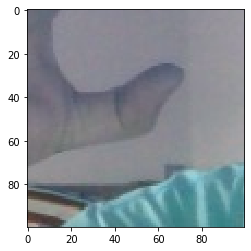

In [0]:
plt.imshow(im2)

In [0]:
def keras_predict(model, image):
    data = np.asarray( image, dtype="int32" )
    
    pred_probab = model.predict(data)[0]
    pred_class = list(pred_probab).index(max(pred_probab))
    return max(pred_probab), pred_class

In [0]:
pred_probab, pred_class = keras_predict(model, im5)
curr = prediction(pred_class)

In [29]:
pred_probab

0.99999666

In [30]:
curr

'Q'

In [31]:
pred_class

16

In [0]:
import cv2  

import numpy as np 
  
 
cap = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
retval, threshold = cv2.threshold(cap, 100, 255, cv2.THRESH_BINARY)
cv2.imshow('threshold',threshold)  

edges = cv2.Canny(threshold,100,200) 
 
cv2.imshow('Edges',edges)

converted = cv2.cvtColor(cap, cv2.COLOR_BGR2HSV)
skinMask = cv2.inRange(converted, lower, upper)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

img_dilation = cv2.dilate(cap, kernel, iterations=1)

cv2.imshow('Input', img)
cv2.imshow('Erosion', img_erosion)
cv2.imshow('Dilation', img_dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()  

DisabledFunctionError: ignored